# This script is used to process precleaned epochs
Cluster test version
## workflow:
* first hypothesis: alpha power in frontal area during FA and OP is stronger than VD
    * frontal area AFz, F1, Fz, F2


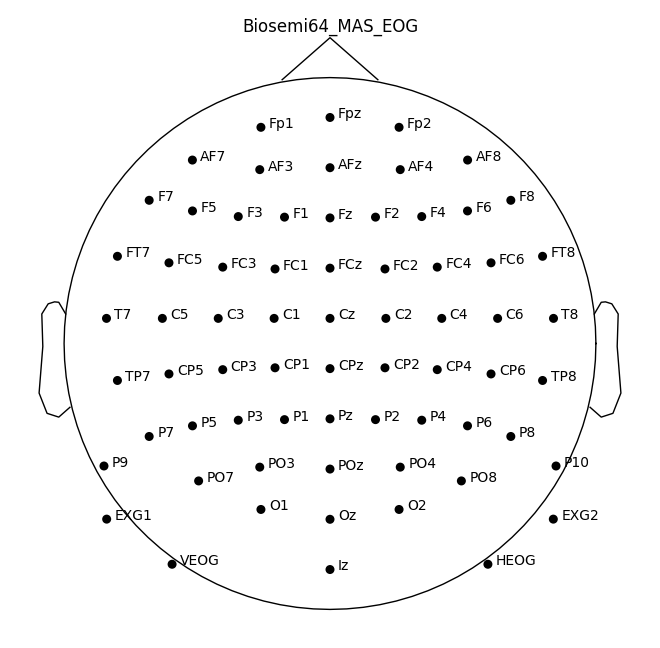

In [5]:
import mne
# montage_fname = '/mnt/data/gansheng/raw_data/Biosemi64_MAS_EOG.locs'
montage_fname = '/home/gansheng.tan/process_mne/INSERM_EEG_Enrico_Proc/data_eeglab/raw_data/Biosemi64_MAS_EOG.locs'
montage_biosemi=mne.channels.read_montage(montage_fname)
%matplotlib qt
montage_biosemi.plot()

In [10]:
# precleaned_epochs_path = '/mnt/data/gansheng/preClean_data/'
precleaned_epochs_path = '/home/gansheng.tan/process_mne/INSERM_EEG_Enrico_Proc/data_eeglab/full_epochs_data/'
subj = '94'
frontal_channels = ['AFz','F1','F2','Fz']
precleaned_epochs_fname = precleaned_epochs_path + 'subj0'+subj+'full_epo.fif'
precleaned_epochs = mne.read_epochs(precleaned_epochs_fname, preload=True)
precleaned_epochs_frontal = precleaned_epochs.copy()
precleaned_epochs_frontal.pick_channels(frontal_channels)


Reading /home/gansheng.tan/process_mne/INSERM_EEG_Enrico_Proc/data_eeglab/full_epochs_data/subj094full_epo.fif ...
    Found the data of interest:
        t =       0.00 ...    2000.00 ms
        0 CTF compensation matrices available
1417 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<EpochsFIF  |   1417 events (all good), 0 - 2 sec, baseline off, ~44.4 MB, data loaded,
 '111.0': 75
 '112.0': 82
 '121.0': 72
 '122.0': 92
 '131.0': 80
 '132.0': 92
 '211.0': 62
 '212.0': 81
 '221.0': 80
 '222.0': 92
 '231.0': 56
 '232.0': 91
 '311.0': 64
 '312.0': 83
 '321.0': 90
 '322.0': 70
 '331.0': 65
 '332.0': 90>

In [12]:
precleaned_epochs_frontal_VD =precleaned_epochs_frontal['111.0','121.0','131.0','112.0','122.0','132.0']
precleaned_epochs_frontal_FA =precleaned_epochs_frontal['211.0','221.0','231.0','212.0','222.0','232.0']
precleaned_epochs_frontal_OP =precleaned_epochs_frontal['311.0','321.0','331.0','312.0','322.0','332.0']

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


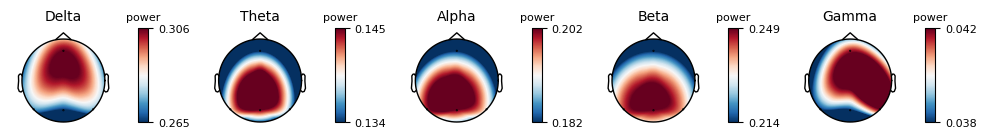

In [17]:
precleaned_epochs_frontal_VD.plot_psd(fmin=0.5,fmax=6.)
precleaned_epochs_frontal_FA.plot_psd(fmin=0.5,fmax=6.)
precleaned_epochs_frontal_OP.plot_psd(fmin=0.5,fmax=6.)
precleaned_epochs_frontal_VD.plot_psd_topomap(normalize=True)
precleaned_epochs_frontal_FA.plot_psd_topomap(normalize=True)
precleaned_epochs_frontal_OP.plot_psd_topomap(normalize=True)


In [16]:
precleaned_epochs_frontal_OP.info

<Info | 19 non-empty fields
    bads : list | 0 items
    ch_names : list | F1, AFz, Fz, F2
    chs : list | 4 items (EEG: 4)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    dig : list | 66 items (66 EEG)
    events : list | 0 items
    file_id : dict | 4 items
    highpass : float | 1.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 100.0 Hz
    meas_date : NoneType | unspecified
    meas_id : dict | 4 items
    nchan : int | 4
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 512.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    experimenter : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneType
    xplotter_layout : NoneType
>

In [13]:
psd_frontal_VD=mne.time_frequency.psd_welch(precleaned_epochs_frontal_VD,fmin=1,fmax=49,n_fft=256,n_overlap=128)

Effective window size : 0.500 (s)
